# Homework 1


In [1]:
import cvxpy as cp
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
xy_train = pd.read_csv('xy_train.csv', 
                       header=None, 
                       names=['Feature 1', 'Feature 2', 'Label'])
xy_test = pd.read_csv('xy_test.csv', 
                       header=None, 
                       names=['Feature 1', 'Feature 2', 'Label'])

In [3]:
X = np.array(xy_train[['Feature 1', 'Feature 2']])
y = np.array(xy_train['Label'])

X_test = np.array(xy_test[['Feature 1', 'Feature 2']])
y_test = np.array(xy_test['Label'])

n, p = X.shape

# Exercise

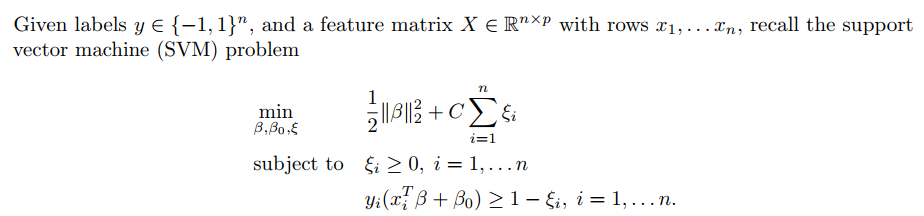

## Phần I

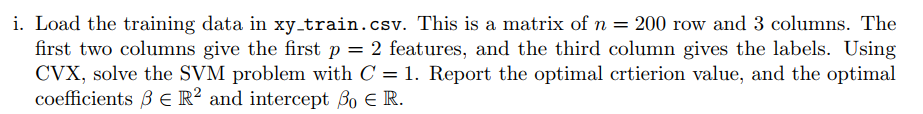

In [4]:
beta = cp.Variable(p)
beta0 = cp.Variable(1)
epsilon = cp.Variable(n)
obj = cp.Minimize(1/2 * cp.norm(beta) ** 2 + cp.sum(epsilon))
constraints = [epsilon >= 0,
              cp.multiply(y, (X @ beta + beta0)) >= 1 - epsilon]
prob = cp.Problem(obj, constraints)
print("Optimal value", prob.solve(solver=cp.ECOS))
print("Beta", beta.value)
print("Beta0", beta0.value)

Optimal value 36.74893264999266
Beta [1.41967191 1.24607477]
Beta0 [-2.82372759]


## Phần II

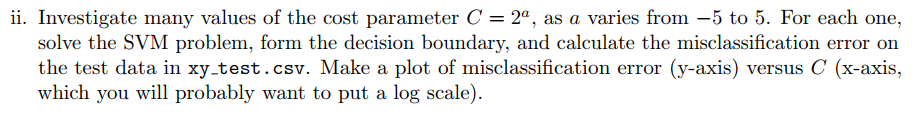

In [5]:
beta = cp.Variable(p)
beta0 = cp.Variable(1)
epsilon = cp.Variable(n)

In [6]:
result = [np.arange(-5, 6), []]
for i in range(-5, 6):
    C = 2 ** i
    obj = cp.Minimize(1/2 * cp.norm(beta) ** 2 + C * cp.sum(epsilon))
    constraints = [epsilon >= 0,
                   cp.multiply(y, (X @ beta + beta0)) >= 1 - epsilon]
    prob = cp.Problem(obj, constraints)
    prob.solve(solver=cp.ECOS)
    
    y_i = beta0.value + X_test @ np.array(beta.value).T >= 0
    y_i = y_i * 2 - 1
    result[1].append(sum(y_i != y_test))

(array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5]),
 [83, 81, 90, 88, 85, 89, 87, 87, 87, 87, 87])

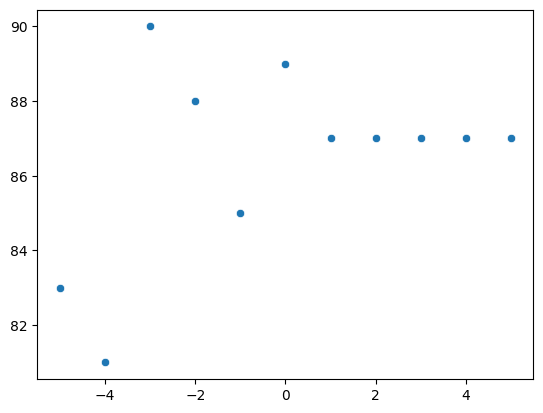

In [7]:
sns.scatterplot(x=result[0], y=result[1])
result[0], result[1]